<a href="https://colab.research.google.com/github/AHQJOHN/Pytorch_with_jovian/blob/main/Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [3]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Label: 5


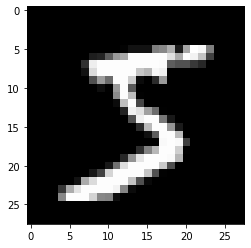

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


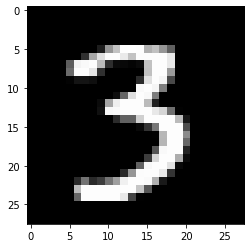

In [7]:
image, label = dataset[10000]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [8]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [9]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


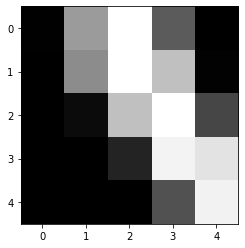

In [11]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [12]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [14]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0056,  0.0076, -0.0051,  ..., -0.0229,  0.0136,  0.0227],
        [ 0.0096, -0.0156,  0.0054,  ..., -0.0317, -0.0220, -0.0020],
        [ 0.0093,  0.0287,  0.0232,  ...,  0.0054,  0.0112,  0.0173],
        ...,
        [ 0.0237,  0.0341, -0.0226,  ..., -0.0086,  0.0208, -0.0353],
        [ 0.0145, -0.0147,  0.0193,  ..., -0.0257,  0.0010,  0.0019],
        [ 0.0299, -0.0135,  0.0016,  ...,  0.0272,  0.0284,  0.0300]],
       requires_grad=True)

In [16]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0194,  0.0042, -0.0254, -0.0219,  0.0058, -0.0041, -0.0004,  0.0182,
         0.0237,  0.0195], requires_grad=True)

In [29]:
for images, labels in train_loader:
    print(labels)
    images = images.reshape(128, 784)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 1, 2, 1, 4, 9, 2, 7, 1, 1, 3, 2, 5, 8, 4, 2, 0, 4, 0, 4, 7, 8, 8, 6,
        4, 8, 6, 1, 9, 9, 7, 8, 4, 0, 5, 6, 4, 3, 2, 8, 8, 1, 7, 4, 1, 3, 6, 1,
        5, 3, 8, 3, 0, 7, 9, 0, 7, 3, 9, 2, 8, 6, 0, 7, 0, 9, 4, 4, 3, 3, 4, 7,
        1, 2, 4, 8, 2, 8, 5, 6, 8, 2, 6, 8, 2, 7, 0, 3, 0, 8, 3, 3, 6, 2, 6, 0,
        0, 4, 4, 1, 1, 6, 9, 7, 9, 2, 4, 9, 1, 0, 2, 1, 0, 1, 6, 0, 4, 2, 1, 9,
        7, 2, 0, 6, 9, 9, 6, 8])
torch.Size([128, 784])
tensor([[ 0.0404,  0.0871,  0.0513,  ..., -0.2926, -0.0128, -0.3458],
        [-0.1655,  0.4343,  0.0869,  ..., -0.0805,  0.1066, -0.1266],
        [-0.0196,  0.0079,  0.0907,  ..., -0.2004,  0.1628, -0.2672],
        ...,
        [-0.1721, -0.0054,  0.1880,  ...,  0.0183, -0.0508, -0.3754],
        [-0.1230,  0.0247,  0.3323,  ..., -0.0233, -0.2423, -0.2600],
        [-0.4627, -0.0009,  0.0644,  ..., -0.4592,  0.1965, -0.0932]],
       grad_fn=<AddmmBackward0>)


In [26]:
# images = train_loader[0]
images.shape

torch.Size([128, 1, 28, 28])

In [27]:
images.reshape(128, 784).shape

torch.Size([128, 784])

### Iterate Over Dataloader

In [44]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


In [38]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age
  def say_hello(self):
    print("Hello my_name is "+self.name+" !")

In [39]:
john = Person("John",30)

In [41]:
john.name, john.age

('John', 30)

In [40]:
john.say_hello()

Hello my_name is John !


In [45]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)  
        # Leaving 1dimention empty to fillup by diviion calculating from all the elements from the tensor
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [46]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [47]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0006,  0.0144,  0.0275,  ...,  0.0260,  0.0003, -0.0159],
         [-0.0244,  0.0022, -0.0215,  ..., -0.0197, -0.0292,  0.0060],
         [ 0.0247,  0.0275,  0.0288,  ...,  0.0192,  0.0142,  0.0237],
         ...,
         [ 0.0274, -0.0254, -0.0187,  ...,  0.0243, -0.0093,  0.0034],
         [ 0.0288,  0.0016, -0.0019,  ..., -0.0256,  0.0098,  0.0183],
         [ 0.0185, -0.0010, -0.0325,  ..., -0.0064, -0.0080, -0.0115]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0161, -0.0125, -0.0290,  0.0256,  0.0275,  0.0342, -0.0113, -0.0009,
         -0.0335, -0.0180], requires_grad=True)]

In [48]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0103, -0.0432, -0.1116, -0.1832, -0.2646,  0.2148, -0.0011, -0.0982,
          0.3591, -0.0425],
        [ 0.3144, -0.3581,  0.0304,  0.0194, -0.0319,  0.2143, -0.0868, -0.3341,
          0.1676, -0.1718]])


In [49]:
print('Sample outputs :\n', outputs[0].data)

Sample outputs :
 tensor([-0.0103, -0.0432, -0.1116, -0.1832, -0.2646,  0.2148, -0.0011, -0.0982,
         0.3591, -0.0425])


In [52]:
import torch.nn.functional as F

In [53]:
probs = F.softmax(outputs, dim=1)
probs

tensor([[0.0992, 0.0960, 0.0896,  ..., 0.0909, 0.1435, 0.0961],
        [0.1372, 0.0700, 0.1033,  ..., 0.0717, 0.1184, 0.0843],
        [0.0967, 0.0776, 0.0871,  ..., 0.0727, 0.1277, 0.1048],
        ...,
        [0.1353, 0.0937, 0.0996,  ..., 0.0668, 0.1261, 0.0851],
        [0.1265, 0.0916, 0.0855,  ..., 0.0778, 0.1230, 0.0826],
        [0.1197, 0.0915, 0.0895,  ..., 0.0781, 0.1330, 0.0745]],
       grad_fn=<SoftmaxBackward0>)

In [54]:
print("Sample probabilities:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0992, 0.0960, 0.0896, 0.0834, 0.0769, 0.1242, 0.1001, 0.0909, 0.1435,
         0.0961],
        [0.1372, 0.0700, 0.1033, 0.1021, 0.0970, 0.1241, 0.0918, 0.0717, 0.1184,
         0.0843]])
Sum:  1.0000001192092896


In [59]:
torch.max(probs[0]).item()

0.14352427423000336